#GOAL : TO PERFORM SENTIMENT ANALYSIS ON AMAZON FOOD REVIEW.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,SimpleRNN,Bidirectional,LSTM,GRU,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/food_review.csv")

EDA and Preprocessing:

In [4]:
df.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [5]:
df.drop(["Unnamed: 0"], axis = 1, inplace= True)

In [6]:
df.shape

(40500, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    40500 non-null  object
 1   Score   40500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 632.9+ KB


In [8]:
df.isnull().sum()

Text     0
Score    0
dtype: int64

In [9]:
df.isin(['?']).sum(axis=0)

Text     0
Score    0
dtype: int64

In [10]:
df.loc[(df['Score'] == 3, 'sentiment')] =1
df.loc[(df['Score'] < 3, 'sentiment')] = 0
df.loc[(df['Score'] > 3, 'sentiment')] = 2

In [11]:
df.head()

,Text,Score,sentiment
0,I bought these from a large chain pet store. a...,1,0.0
1,"This soup is incredibly good! But honestly, I...",5,2.0
2,Our family loves these tasty and healthy sesam...,5,2.0
3,The local auto shop offers this free to it cus...,4,2.0
4,I brought 2 bottles. One I carry in my pocket...,5,2.0


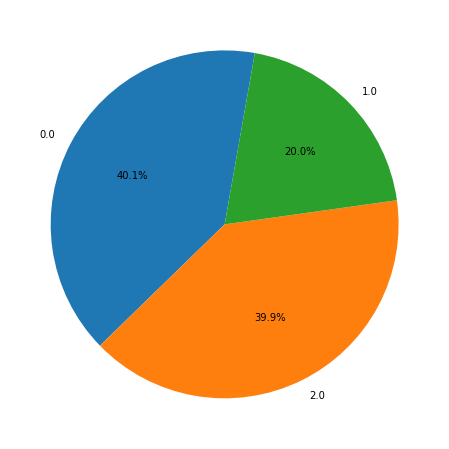

In [12]:
plt.figure(figsize=(8,8))
plt.pie(df['sentiment'].value_counts(),labels=df['sentiment'].unique(), autopct="%.1f%%", startangle= 80)
plt.show()

#Visualizing each label by WORD CLOUD:

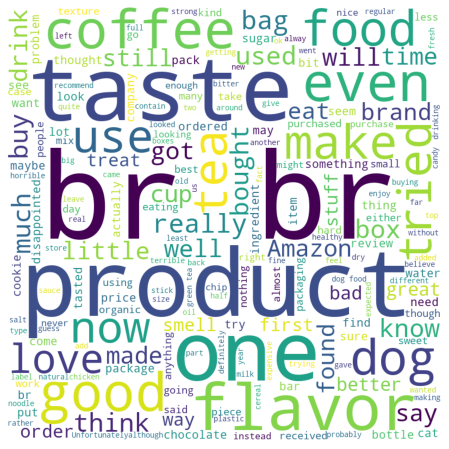

In [15]:
#LABEL 0
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["sentiment"]==0.0]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

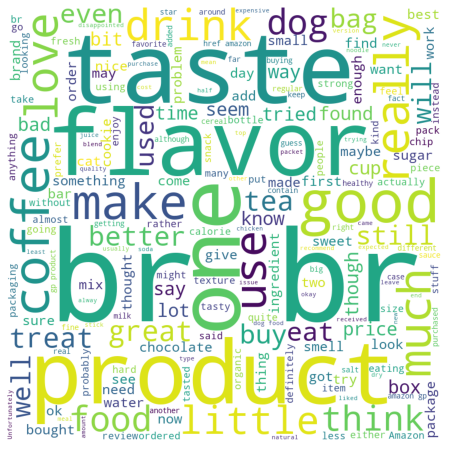

In [16]:
#LABEL 1
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["sentiment"]==1]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

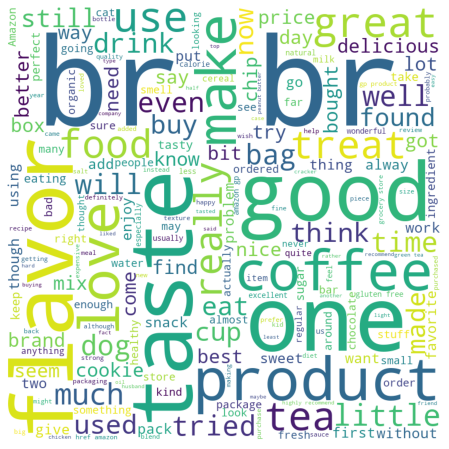

In [17]:
#LABEL 2
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["sentiment"]==2]["Text"]))

plt.figure(figsize = (8,8)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sentiment"]=le.fit_transform( df["sentiment"])

In [ ]:
X = df["Text"]
y = df["sentiment"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#Tokenization:

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
doc_length = []
for doc in train_sequences:
  doc_length.append(len(doc))
max(doc_length)

1761

In [ ]:
np.quantile(doc_length,0.98)

326.0

In [ ]:
max_len = 326
train_padded = pad_sequences(train_sequences , maxlen=max_len)
print(train_padded)

[[   0    0    0 ...   17  545 1502]
 [   0    0    0 ...    4  520  290]
 [   0    0    0 ...   86  394   11]
 ...
 [   0    0    0 ...   85 1948 1179]
 [   0    0    0 ...  771   54   11]
 [   0    0    0 ...  191 3017  288]]


In [ ]:
vocab_len = len(tokenizer.index_word)+1

#*FEED FORWARD NEURAL NETWORK:*

In [ ]:
model_1 = Sequential()
model_1.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model_1.add(Flatten())
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(4,activation="softmax"))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 326, 10)           347330    
_________________________________________________________________
flatten (Flatten)            (None, 3260)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                52176     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 399,574
Trainable params: 399,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam') 

In [ ]:
history = model_1.fit(train_padded,y_train,epochs=10,batch_size=50)

Epoch 1/10
567/567 [==============================] - 4s 6ms/step - loss: 0.8985
Epoch 2/10
567/567 [==============================] - 3s 6ms/step - loss: 0.6347
Epoch 3/10
567/567 [==============================] - 3s 6ms/step - loss: 0.4764
Epoch 4/10
567/567 [==============================] - 3s 6ms/step - loss: 0.3264
Epoch 5/10
567/567 [==============================] - 3s 6ms/step - loss: 0.2026
Epoch 6/10
567/567 [==============================] - 3s 6ms/step - loss: 0.1193
Epoch 7/10
567/567 [==============================] - 3s 6ms/step - loss: 0.0665
Epoch 8/10
567/567 [==============================] - 3s 6ms/step - loss: 0.0350
Epoch 9/10
567/567 [==============================] - 3s 6ms/step - loss: 0.0180
Epoch 10/10
567/567 [==============================] - 4s 6ms/step - loss: 0.0095


In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

In [ ]:
y_pred_1 = model_1.predict(test_padded)

In [ ]:
y_pred_1 = y_pred_1.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      4835
           1       0.47      0.40      0.43      2492
           2       0.76      0.75      0.76      4823

    accuracy                           0.69     12150
   macro avg       0.65      0.64      0.64     12150
weighted avg       0.68      0.69      0.68     12150



We observe that using Feed Forward Network we get an accuracy of 69 percent.

#RECURRENT NEURAL NETWORK:

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model2.add(SimpleRNN(16, activation="relu",))
model2.add(Dropout(0.5))
model2.add(Dense(8, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(4,activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 335, 10)           347330    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                432       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
Total params: 347,934
Trainable params: 347,934
Non-trainable params: 0
________________________________________________

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam') 

In [ ]:
model2.fit(train_padded,y_train,epochs=15,batch_size=50)

Epoch 1/15
567/567 [==============================] - 54s 93ms/step - loss: 1.1583
Epoch 2/15
567/567 [==============================] - 53s 93ms/step - loss: 1.0115
Epoch 3/15
567/567 [==============================] - 52s 91ms/step - loss: 0.8984
Epoch 4/15
567/567 [==============================] - 52s 91ms/step - loss: 0.8132
Epoch 5/15
567/567 [==============================] - 52s 91ms/step - loss: 0.7597
Epoch 6/15
567/567 [==============================] - 51s 91ms/step - loss: 0.7441
Epoch 7/15
567/567 [==============================] - 51s 91ms/step - loss: 0.7080
Epoch 8/15
567/567 [==============================] - 52s 91ms/step - loss: 0.6319
Epoch 9/15
567/567 [==============================] - 52s 91ms/step - loss: 0.5936
Epoch 10/15
567/567 [==============================] - 52s 91ms/step - loss: 0.5629
Epoch 11/15
567/567 [==============================] - 52s 91ms/step - loss: 0.5321
Epoch 12/15
567/567 [==============================] - 52s 91ms/step - loss: 0.5396
E

In [ ]:
y_pred_2 = model2.predict(test_padded)

In [ ]:
y_pred_2 = y_pred_2.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      4835
           1       0.37      0.29      0.33      2492
           2       0.69      0.83      0.75      4823

    accuracy                           0.66     12150
   macro avg       0.60      0.60      0.60     12150
weighted avg       0.65      0.66      0.65     12150



Its observed that using RECURRENT NEURAL NETWORK we are getting an accuracy of 66 percent.

#*BIDIRECTIONAL RECURRENT NEURAL NETWORK:*

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model3.add(Bidirectional(SimpleRNN(16, activation="relu")))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(4,activation="softmax"))

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 335, 10)           347330    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                864       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
Total params: 348,494
Trainable params: 348,494
Non-trainable params: 0
________________________________________________

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam') 

In [ ]:
model3.fit(train_padded,y_train,epochs=15,batch_size=50)

Epoch 1/15
567/567 [==============================] - 96s 165ms/step - loss: 1.1973
Epoch 2/15
567/567 [==============================] - 93s 165ms/step - loss: 1.0779
Epoch 3/15
567/567 [==============================] - 94s 166ms/step - loss: 1.0498
Epoch 4/15
567/567 [==============================] - 95s 168ms/step - loss: 0.9654
Epoch 5/15
567/567 [==============================] - 94s 167ms/step - loss: 0.8521
Epoch 6/15
567/567 [==============================] - 94s 165ms/step - loss: 0.7682
Epoch 7/15
567/567 [==============================] - 94s 166ms/step - loss: 0.6924
Epoch 8/15
567/567 [==============================] - 94s 165ms/step - loss: 0.6483
Epoch 9/15
567/567 [==============================] - 95s 168ms/step - loss: 0.6139
Epoch 10/15
567/567 [==============================] - 98s 173ms/step - loss: 0.5804
Epoch 11/15
567/567 [==============================] - 96s 169ms/step - loss: 0.5603
Epoch 12/15
567/567 [==============================] - 96s 168ms/step - lo

In [ ]:
y_pred_3 = model3.predict(test_padded)

In [ ]:
y_pred_3 = y_pred_3.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72      4835
           1       0.32      0.09      0.14      2492
           2       0.78      0.76      0.77      4823

    accuracy                           0.66     12150
   macro avg       0.57      0.57      0.54     12150
weighted avg       0.62      0.66      0.62     12150



Its observed that using BIDIRECTIONAL RECURRENT NEURAL NETWORK we are getting an accuracy of 66 percent.

#GATED RECURRENT UNIT:

In [ ]:
model6 = Sequential()
model6.add(Embedding(vocab_len, 10, input_length=max_len, mask_zero=True))
model6.add(Bidirectional(GRU(16, activation="relu")))
model6.add(Dropout(0.5))
model6.add(Dense(16, activation="relu"))
model6.add(Dropout(0.5))
model6.add(Dense(4,activation="softmax"))

In [ ]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 326, 10)           347330    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                2688      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 350,614
Trainable params: 350,614
Non-trainable params: 0
________________________________________________

In [ ]:
model6.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam') 

In [ ]:
model6.fit(train_padded,y_train,epochs=20,batch_size=50)

Epoch 1/20
567/567 [==============================] - 106s 183ms/step - loss: 1.1260
Epoch 2/20
567/567 [==============================] - 104s 183ms/step - loss: 0.9264
Epoch 3/20
567/567 [==============================] - 105s 186ms/step - loss: 0.7760
Epoch 4/20
567/567 [==============================] - 104s 183ms/step - loss: 0.6698
Epoch 5/20
567/567 [==============================] - 105s 185ms/step - loss: 0.6035
Epoch 6/20
567/567 [==============================] - 106s 186ms/step - loss: 0.5557
Epoch 7/20
567/567 [==============================] - 105s 185ms/step - loss: 0.5151
Epoch 8/20
567/567 [==============================] - 104s 183ms/step - loss: 0.4904
Epoch 9/20
567/567 [==============================] - 104s 184ms/step - loss: 0.4517
Epoch 10/20
567/567 [==============================] - 104s 183ms/step - loss: 0.4242
Epoch 11/20
567/567 [==============================] - 104s 184ms/step - loss: 0.3979
Epoch 12/20
567/567 [==============================] - 105s 185

In [ ]:
y_pred_4 = model6.predict(test_padded)

In [ ]:
y_pred_4 = y_pred_4.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      4835
           1       0.41      0.35      0.38      2492
           2       0.76      0.75      0.75      4823

    accuracy                           0.68     12150
   macro avg       0.63      0.62      0.62     12150
weighted avg       0.67      0.68      0.67     12150



Its observed that using GRU NEURAL NETWORK we are getting an accuracy of 68 percent.

#VECTORIZATION:

##COUNT VECTORIZATION:

In [ ]:
cv = CountVectorizer(stop_words="english")

In [ ]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

#LOGISTIC REGRESSION:

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_cv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test_cv)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      4835
           1       0.48      0.39      0.43      2492
           2       0.74      0.79      0.77      4823

    accuracy                           0.70     12150
   macro avg       0.65      0.65      0.65     12150
weighted avg       0.68      0.70      0.69     12150



We observe that using Logestic Regression with Count vector we get an accuracy of 70 percent.

#SUPPORT VECTOR MACHINE:

In [ ]:
lsv = LinearSVC(C=0.5,random_state=1)

In [ ]:
lsv.fit(X_train_cv,y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_lsv = lsv.predict(X_test_cv)

In [ ]:
print(classification_report(y_test,y_pred_lsv))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      4835
           1       0.48      0.40      0.44      2492
           2       0.73      0.79      0.76      4823

    accuracy                           0.69     12150
   macro avg       0.65      0.64      0.64     12150
weighted avg       0.68      0.69      0.69     12150



Its observed that using SVM with count vector we are getting an accuracy of 69 percent.

#RandomForestClassifier:

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
rfc.fit(X_train_cv,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test_cv)

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76      4835
           1       0.89      0.18      0.29      2492
           2       0.70      0.85      0.77      4823

    accuracy                           0.71     12150
   macro avg       0.76      0.62      0.61     12150
weighted avg       0.74      0.71      0.67     12150



Its observed that using RANDOMFORESTCLASSIFIER with Count Vector we are getting an accuracy of 71 percent.

#TF-IDF Vectorization:

In [ ]:
tfidf = TfidfVectorizer(stop_words = "english")

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1 = lr.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4835
           1       0.55      0.28      0.37      2492
           2       0.74      0.83      0.78      4823

    accuracy                           0.71     12150
   macro avg       0.67      0.64      0.64     12150
weighted avg       0.69      0.71      0.69     12150



We observe that using Logestic Regression with TF-IDF vector we get an accuracy of 71 percent.

#SUPPORT VECTOR MACHINE:

In [ ]:
lsv = LinearSVC(C=0.5,random_state=1)

In [ ]:
lsv.fit(X_train_tfidf,y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_tf = lsv.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test,y_pred_tf))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      4835
           1       0.55      0.31      0.40      2492
           2       0.74      0.83      0.78      4823

    accuracy                           0.71     12150
   macro avg       0.67      0.65      0.65     12150
weighted avg       0.70      0.71      0.70     12150



Its observed that using SVM with count vector we are getting an accuracy of 71 percent.

#RandomForestClassifier:

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=1)

In [ ]:
 rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      4835
           1       0.94      0.17      0.29      2492
           2       0.70      0.84      0.77      4823

    accuracy                           0.70     12150
   macro avg       0.78      0.62      0.60     12150
weighted avg       0.74      0.70      0.66     12150



Its observed that using RANDOMFORESTCLASSIFIER with TF-IDF Vector we are getting an accuracy of 70 percent.

#Visualizing the Sentiments:

In [ ]:
df_pred = pd.DataFrame({'lab':y_pred_rfc})

In [ ]:
df_pred.head()

,lab,sentiment
0,0,Negative
1,0,Negative
2,2,Positive
3,2,Positive
4,0,Negative


In [ ]:
df_pred.loc[(df_pred['lab'] == 0, 'sentiment')] = 'Negative'
df_pred.loc[(df_pred['lab'] == 1, 'sentiment')] = 'Neutral'
df_pred.loc[(df_pred['lab'] == 2, 'sentiment')] = 'Positive'

In [ ]:
df_pred.head()

,lab,sentiment
0,0,Negative
1,0,Negative
2,2,Positive
3,2,Positive
4,0,Negative


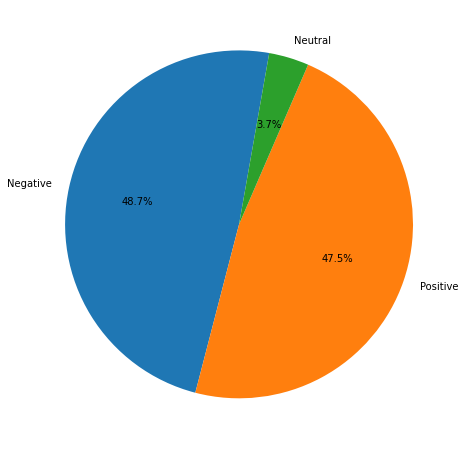

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df_pred["sentiment"].value_counts(), labels= df_pred["sentiment"].unique(), autopct="%.1f%%", startangle= 80)
plt.show()

**CONCLUSION**: After building various Machine learning and Deep learning model we observe that- RNN is giving us an accuracy of 66 percent, BRNN, LSTM and GRU are all giving us an accuracy of 68 percent, while its strange that using Feed Forward Neural Network we are getting an accuracy of 69 percent. Talking about Machine Learning models we have build Logestic Regression, Support Vector Machine and Random Forest using Count and TF-IDF vectoriztion. Based on our models we can conclude that Random Forest with Count Vector is giving us the highest accuracy of 71 percent.

